# Jupyter vs Streamlit

Jupyter notebooks are great to explore a dataset. Let's do that here: we have stored the titanic CSV in the subfolder "files". It's downloaded from [Kaggle](https://www.kaggle.com/datasets/vinicius150987/titanic3). We'll install the libraries, import the dataset and show some graphs.

## Installing libraries

We need pandas, matplotlib and numpy. If you're working with Excel-files (not CSV's) you'll also need openpyxl and of you want really pretty graphs look at seaborn. (The idea is that Python is used as much as it is because of the libraries.)

If you installed the requirements.txt you don't need to run the following commnands. They won't be included in the next notebooks, but for now it's nice to include them just the once, if only to show the "!"-syntax that runs commands in the shell in stead of in python. An alternative is "%" which runs the commands in the shell but using jupyter-python. [It's a long story.](https://dnmtechs.com/difference-between-and-in-jupyter-notebooks-in-python-3/)

In [ ]:
# !pip install pandas matplotlib numpy openpyxl

## Importing

Import csv-files in pandas is quite easy, really.

In [2]:
import pandas as pd

df = pd.read_excel('files/titanic3.xlsx', engine='openpyxl')
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Some graphs

Some quick and easy graphs to get a feel of the dataset. We're not cleaning it up just yet.

First plot the age of the passengers vs their fare and color the dots based on the class they were in. So you'll need:

* A scatter plot
* 'age' on the X-axis
* 'fare' on the Y-axis
* 'pclass' on the color (C)

We'll give you the code for this graph:

<Axes: xlabel='age', ylabel='fare'>

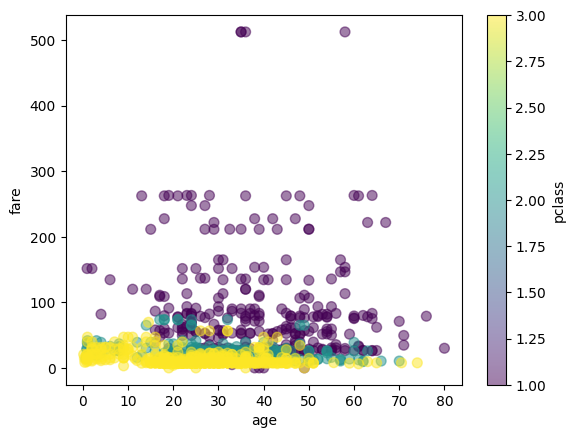

In [3]:
df.plot.scatter(x='age', y='fare', c='pclass', colormap='viridis', s=50, alpha=0.5)

This way of creating a graph, starting out with the dataframe, choosing plot, etc. is directly from pandas. But pandas is mainly known for the dataframe it entails. The graphs are derived from matplotlib (which also needs to be installed). For reasons that will become clear later on we'll now add some code to the graph we made before.

Mainly, we're creating a figure and axes first by using "plt.subplots()". This "ax" is then passed to de plot (which is the same code as before but has the "ax"-parameter added). Then we can customize the graph (add title and labels) and finally show using "plt.show()".

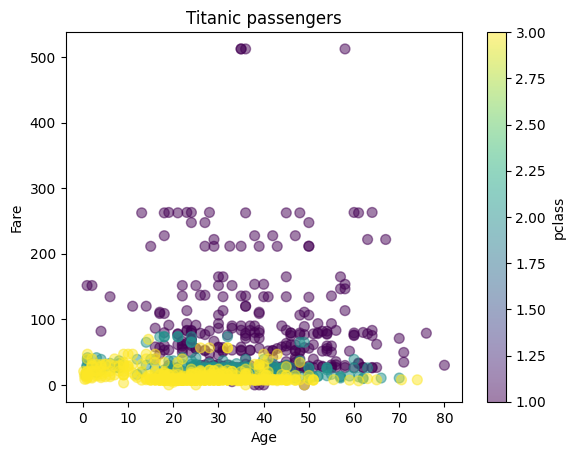

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot.scatter(x='age', y='fare', c='pclass', colormap='viridis', s=50, alpha=0.5, ax=ax)
ax.set_title('Titanic passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
# show the plot
plt.show()


Make a histogram of all ages on the titanic. Keep on using the long syntax (with matplotlib) we used earlier.

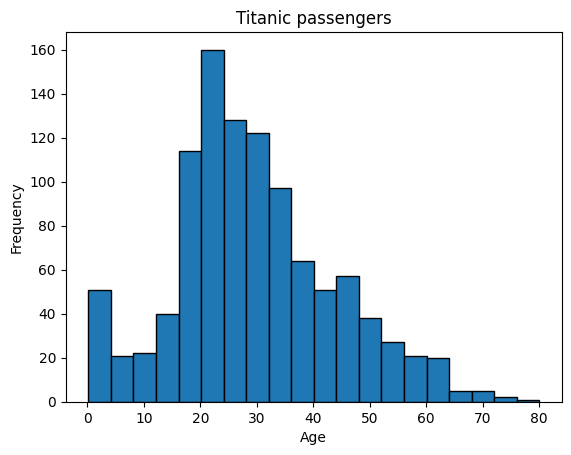

In [5]:
#DELETE

fig, ax = plt.subplots()

df.age.plot.hist(bins=20, edgecolor='k', ax=ax)
ax.set_title('Titanic passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

Show a boxplot of the ages, divided by the class they were in.

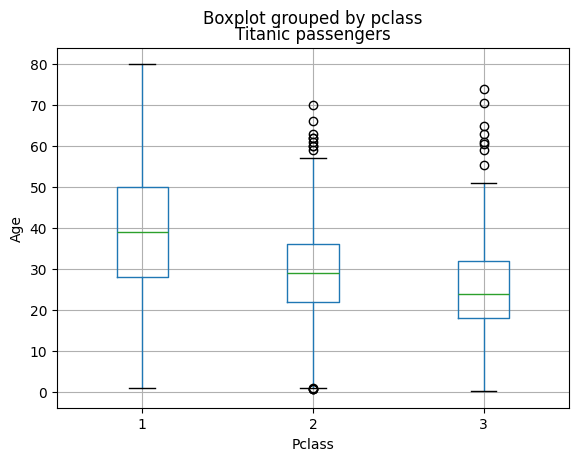

In [6]:
#DELETE

fig, ax = plt.subplots()

df.boxplot(column='age', by='pclass', ax=ax)
ax.set_title('Titanic passengers')
ax.set_xlabel('Pclass')
ax.set_ylabel('Age')
plt.show()

## Streamlit

Jupyter notebooks are nice, but not very interactive. If you want to change the graphs you have to change the settings and to show them (and rerun them) you need to install vscode, python, libraries, ...

Streamlit solves all this, but the caveat is it requires python scripts, not jupyter-notebooks.

We'll create code here first and put them in a streamlit file later on.

### Filtered dataframe

Filter the dataframe bas on two ages: the minimum and maximum age. Enter these ages as variables for now.

In [7]:
min_age = 70
max_age = 80

#filter the dataframe
df_filtered = df[(df.age >= min_age) & (df.age <= max_age)]
df_filtered

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,6,NaN,"Little Onn Hall, Staffs"
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269.0,"Milwaukee, WI"
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,NaN,NaN,"New York, NY"
506,2,0,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,NaN,NaN,"Guernsey / Montclair, NJ and/or Toledo, Ohio"
727,3,0,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,NaN,171.0,NaN
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,NaN,NaN,NaN


### Histogram

Create a histogram of the prices paid (fare) for all people between two ages. Enter these ages as variables again.

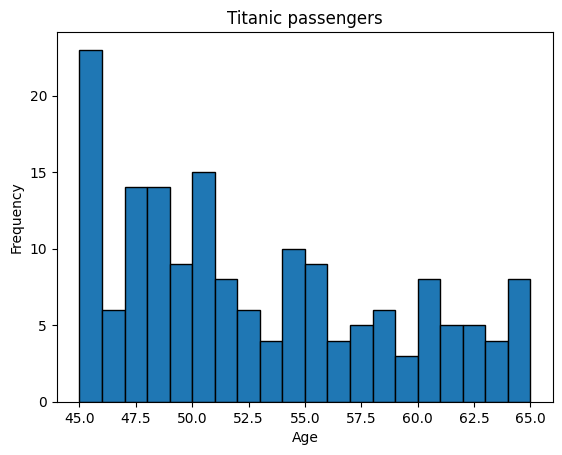

In [8]:
# DELETE

min_age = 45
max_age = 65

#filter the dataframe
df_filtered = df[(df.age >= min_age) & (df.age <= max_age)]

# show the graph
fig, ax = plt.subplots()

df_filtered.age.plot.hist(bins=20, edgecolor='k', ax=ax)
ax.set_title('Titanic passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
plt.show()

### Boxplot by embarked

The titanic made 3 stops to pick up passengers: **S**outhampton, **C**herbourg and **Q**ueenstown. Show the boxplot of ages based on class, filtered on the place of embarkement.

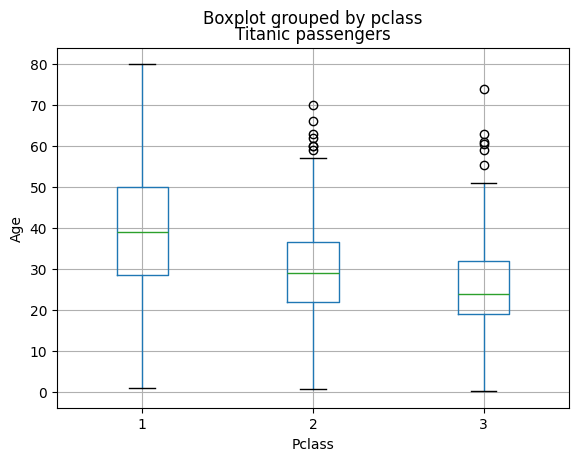

In [11]:
# DELETE

embarkment = "S"


df_filtered = df[df.embarked == embarkment]

fig, ax = plt.subplots()

df_filtered.boxplot(column='age', by='pclass', ax=ax)
ax.set_title('Titanic passengers')
ax.set_xlabel('Pclass')
ax.set_ylabel('Age')
plt.show()

### Widgets

Note how we always made you define a variable before filtering the dataframe? These will become [widgets](https://docs.streamlit.io/library/api-reference/widgets) in the streamlit-app.

* Age: [slider](https://docs.streamlit.io/library/api-reference/widgets/st.slider)
* Embarked: [selectbox](https://docs.streamlit.io/library/api-reference/widgets/st.selectbox)

And the graphs? They can be plotted using "st.pyplot(fig)" with fig being the fig-variable we've been creating.

The code for this can be found in the file "3.3 - First streamlit.py"

It's a first try and could using some updates. The selection boxes and results are all below each other, making it a very un-userfriendly website. But as a poc it's fine!